# High School Performance Project Python Code
## Kiana Gonzalez-Rodholm
### March 3, 2022

In [1]:
# import libaries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Data Preparation

In [2]:
# read in data sets
Student_mat = pd.read_csv('student-mat.csv')
Student_por = pd.read_csv('student-por.csv')

In [3]:
# view Math class dataframe
Student_mat.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [4]:
# view Portuguese class dataframe
Student_por.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [5]:
# changing binary variables into dummy variables for math class
Student_mat['sex'] = Student_mat['sex'].map({'M':1,'F':0})
Student_mat['Pstatus'] = Student_mat['Pstatus'].map({'T':1,'A':0})
Student_mat['schoolsup'] = Student_mat['schoolsup'].map({'yes':1,'no':0})
Student_mat['famsup'] = Student_mat['famsup'].map({'yes':1,'no':0})
Student_mat['paid'] = Student_mat['paid'].map({'yes':1,'no':0})
Student_mat['activities'] = Student_mat['activities'].map({'yes':1,'no':0})
Student_mat['nursery'] = Student_mat['nursery'].map({'yes':1,'no':0})
Student_mat['higher'] = Student_mat['higher'].map({'yes':1,'no':0})
Student_mat['internet'] = Student_mat['internet'].map({'yes':1,'no':0})
Student_mat['romantic'] = Student_mat['romantic'].map({'yes':1,'no':0})

In [6]:
# changing binary variables into dummy variables for Portuguese class
Student_por['sex'] = Student_por['sex'].map({'M':1,'F':0})
Student_por['Pstatus'] = Student_por['Pstatus'].map({'T':1,'A':0})
Student_por['schoolsup'] = Student_por['schoolsup'].map({'yes':1,'no':0})
Student_por['famsup'] = Student_por['famsup'].map({'yes':1,'no':0})
Student_por['paid'] = Student_por['paid'].map({'yes':1,'no':0})
Student_por['activities'] = Student_por['activities'].map({'yes':1,'no':0})
Student_por['nursery'] = Student_por['nursery'].map({'yes':1,'no':0})
Student_por['higher'] = Student_por['higher'].map({'yes':1,'no':0})
Student_por['internet'] = Student_por['internet'].map({'yes':1,'no':0})
Student_por['romantic'] = Student_por['romantic'].map({'yes':1,'no':0})

In [7]:
Student_mat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    int64 
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    int64 
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    int64 
 16  famsup      395 non-null    int64 
 17  paid        395 non-null    int64 
 18  activities  395 non-null    int64 
 19  nursery     395 non-null    int64 
 20  higher    

In [8]:
Student_por.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    int64 
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    int64 
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    int64 
 16  famsup      649 non-null    int64 
 17  paid        649 non-null    int64 
 18  activities  649 non-null    int64 
 19  nursery     649 non-null    int64 
 20  higher    

## Data Visualization/Analysis

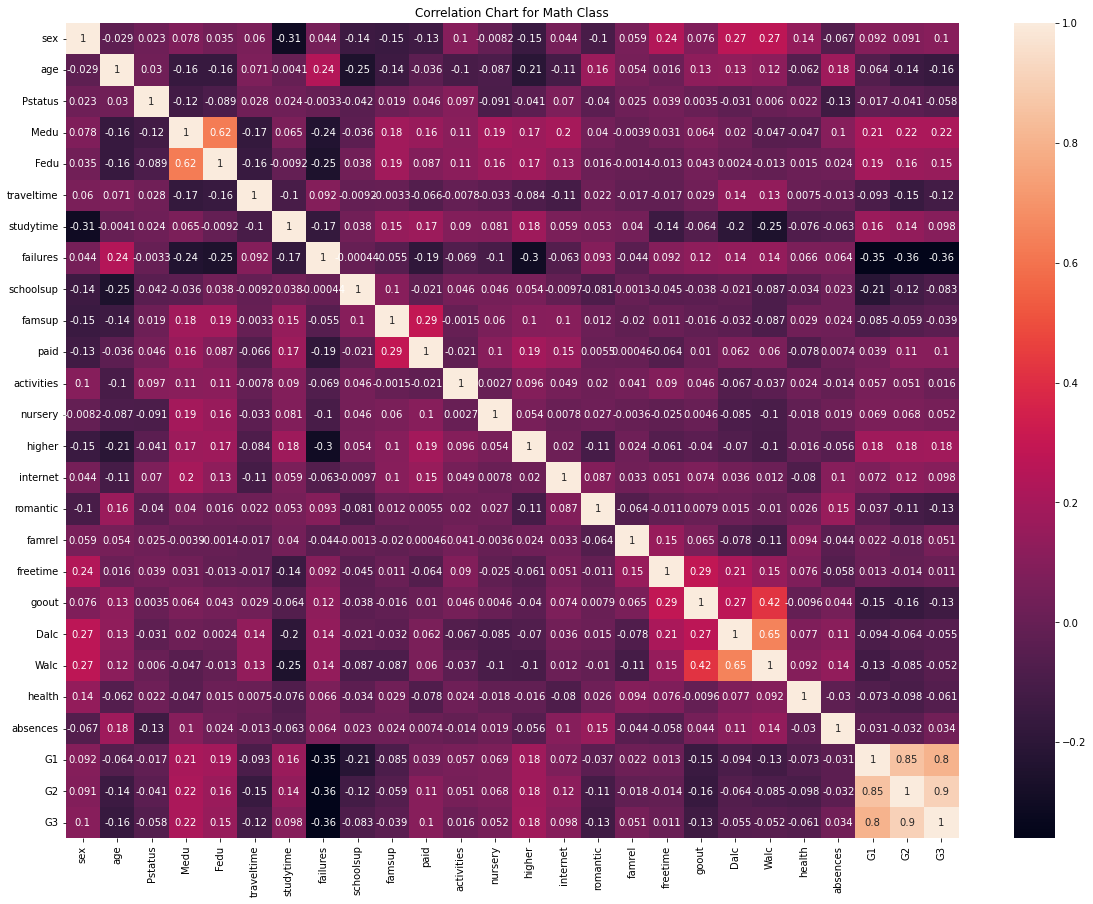

In [9]:
# correlation chart for math class
plt.figure(figsize=(20,15))
sns.heatmap(Student_mat.corr(),annot=True)
plt.title('Correlation Chart for Math Class')
plt.show()

In [10]:
# Positive correlations with grades are mother/fathers education as well as study time and the want to take higher education.
# Negative correlations are failures and going out with friends. 

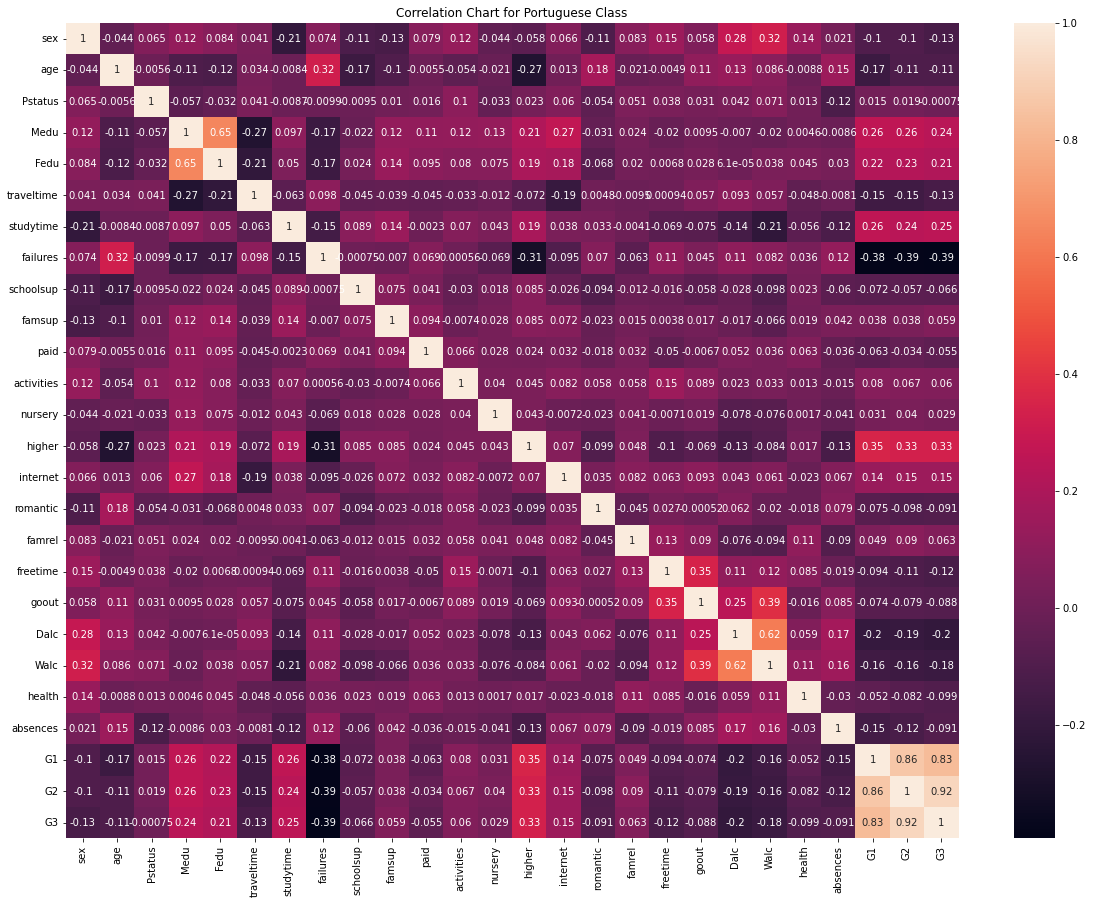

In [11]:
# correlation chart for Portuguese class
plt.figure(figsize=(20,15))
sns.heatmap(Student_por.corr(),annot=True)
plt.title('Correlation Chart for Portuguese Class')
plt.show()

In [12]:
# Positive correlations include mother/father's education, study time, and the want for higher education.
# This is the same as positive correlations for math. 
# Negative correlations include failures and workday and weekend alchohol consumption. 

In [13]:
# Comparing the two graphs, we can see that grades of math students have lower negative correlations with workday and 
# weekday alchohol consumption than Portuguese language students. 
# The effect of romantic relationships on on Portuguese students is more than Math students.
# The obvious indicatures of correlation on grades is that if the student has failed in the past,
# they are more likely to get them again.
# Also if the student wants to go to college or they have successfull parents they are more likely to succeed.

In [14]:
# stats on math data
Student_mat.describe()

,sex,age,Pstatus,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,...,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,0.473418,16.696203,0.896203,2.749367,2.521519,1.448101,2.035443,0.334177,0.129114,0.612658,...,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,0.499926,1.276043,0.305384,1.094735,1.088201,0.697505,0.839240,0.743651,0.335751,0.487761,...,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,0.000000,15.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,0.000000,16.000000,1.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,0.000000,17.000000,1.000000,3.000000,2.000000,1.000000,2.000000,0.000000,0.000000,1.000000,...,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,1.000000,18.000000,1.000000,4.000000,3.000000,2.000000,2.000000,0.000000,0.000000,1.000000,...,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,1.000000,22.000000,1.000000,4.000000,4.000000,4.000000,4.000000,3.000000,1.000000,1.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [15]:
# stats on Portuguese data
Student_por.describe()

,sex,age,Pstatus,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,...,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,0.409861,16.744222,0.876733,2.514638,2.306626,1.568567,1.930663,0.221880,0.104777,0.613251,...,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,0.492187,1.218138,0.328996,1.134552,1.099931,0.748660,0.829510,0.593235,0.306502,0.487381,...,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,0.000000,15.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,16.000000,1.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,0.000000,17.000000,1.000000,2.000000,2.000000,1.000000,2.000000,0.000000,0.000000,1.000000,...,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,1.000000,18.000000,1.000000,4.000000,3.000000,2.000000,2.000000,0.000000,0.000000,1.000000,...,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,1.000000,22.000000,1.000000,4.000000,4.000000,4.000000,4.000000,3.000000,1.000000,1.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


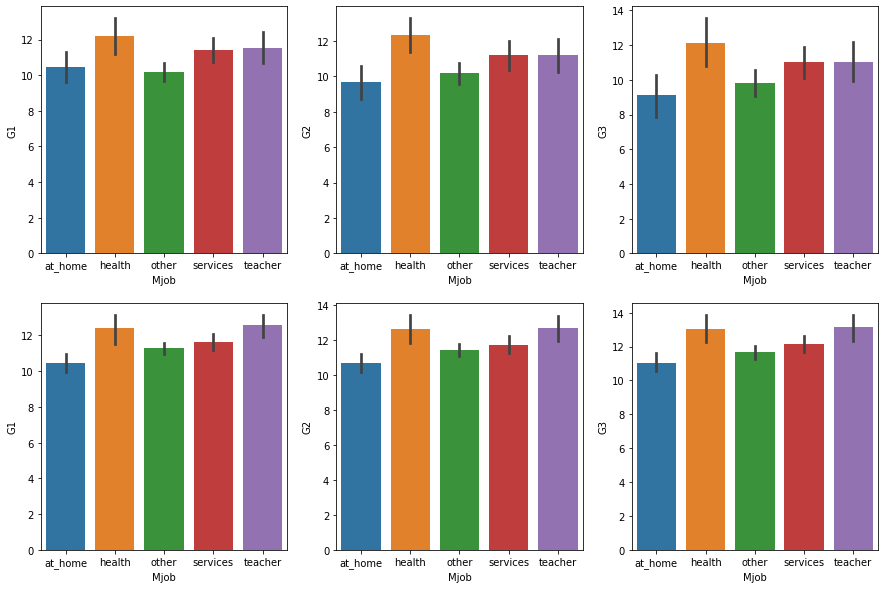

In [16]:
# bar plots of mother's job
# Math
plt.figure(figsize=(15,10))
plt.subplot(2,3,1)
sns.barplot(x='Mjob',y='G1',data=Student_mat)
plt.subplot(2,3,2)
sns.barplot(x='Mjob',y='G2',data=Student_mat)
plt.subplot(2,3,3)
sns.barplot(x='Mjob',y='G3',data=Student_mat)
# Portugese
plt.subplot(2,3,4)
sns.barplot(x='Mjob',y='G1',data=Student_por)
plt.subplot(2,3,5)
sns.barplot(x='Mjob',y='G2',data=Student_por)
plt.subplot(2,3,6)
sns.barplot(x='Mjob',y='G3',data=Student_por)
plt.show()

In [17]:
# students with mothers in the heath care field or teachers tend to do better in school

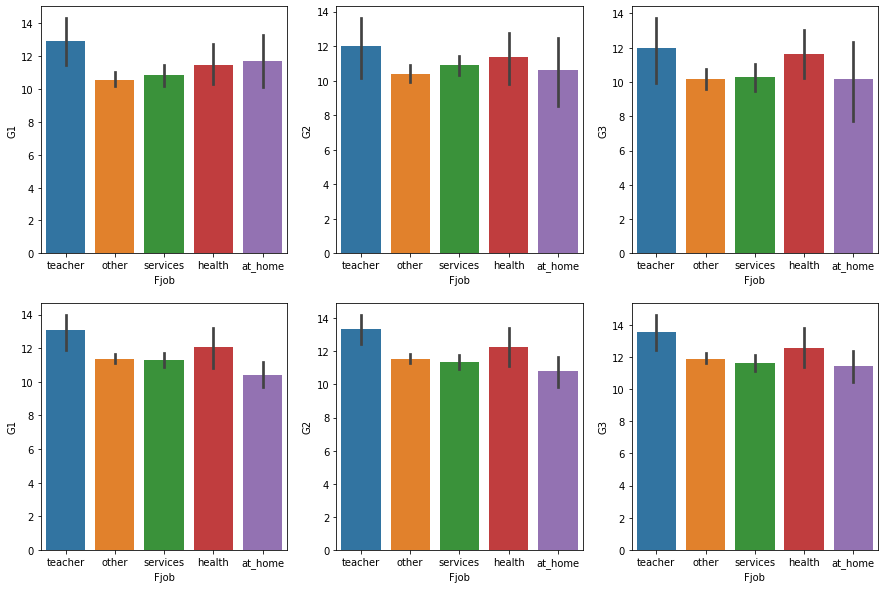

In [18]:
# Bar plots of father's job
# Math
plt.figure(figsize=(15,10))
plt.subplot(2,3,1)
sns.barplot(x='Fjob',y='G1',data=Student_mat)
plt.subplot(2,3,2)
sns.barplot(x='Fjob',y='G2',data=Student_mat)
plt.subplot(2,3,3)
sns.barplot(x='Fjob',y='G3',data=Student_mat)
# Portugese
plt.subplot(2,3,4)
sns.barplot(x='Fjob',y='G1',data=Student_por)
plt.subplot(2,3,5)
sns.barplot(x='Fjob',y='G2',data=Student_por)
plt.subplot(2,3,6)
sns.barplot(x='Fjob',y='G3',data=Student_por)
plt.show()

In [19]:
# fathers who are teachers tend to help students do better in their class as well

In [20]:
# dummy variables for categorical variables for math class
temp = pd.get_dummies(Student_mat['school'],drop_first=True)
Student_mat = pd.concat([Student_mat,temp],axis=1)
Student_mat.drop('school',axis=1,inplace=True)

temp = pd.get_dummies(Student_mat['address'],drop_first=True)
Student_mat = pd.concat([Student_mat,temp],axis=1)
Student_mat.drop('address',axis=1,inplace=True)

temp = pd.get_dummies(Student_mat['famsize'],drop_first=True)
Student_mat = pd.concat([Student_mat,temp],axis=1)
Student_mat.drop('famsize',axis=1,inplace=True)

temp = pd.get_dummies(Student_mat['Mjob'],drop_first=True)
Student_mat = pd.concat([Student_mat,temp],axis=1)
Student_mat.drop('Mjob',axis=1,inplace=True)

temp = pd.get_dummies(Student_mat['Fjob'],drop_first=True)
Student_mat = pd.concat([Student_mat,temp],axis=1)
Student_mat.drop('Fjob',axis=1,inplace=True)

temp = pd.get_dummies(Student_mat['reason'],drop_first=True)
Student_mat = pd.concat([Student_mat,temp],axis=1)
Student_mat.drop('reason',axis=1,inplace=True)

temp = pd.get_dummies(Student_mat['guardian'],drop_first=True)
Student_mat = pd.concat([Student_mat,temp],axis=1)
Student_mat.drop('guardian',axis=1,inplace=True)

In [21]:
# dummy variables for categorical variables for portuguese class
temp = pd.get_dummies(Student_por['school'],drop_first=True)
Student_por = pd.concat([Student_por,temp],axis=1)
Student_por.drop('school',axis=1,inplace=True)

temp = pd.get_dummies(Student_por['address'],drop_first=True)
Student_por = pd.concat([Student_por,temp],axis=1)
Student_por.drop('address',axis=1,inplace=True)

temp = pd.get_dummies(Student_por['famsize'],drop_first=True)
Student_por = pd.concat([Student_por,temp],axis=1)
Student_por.drop('famsize',axis=1,inplace=True)

temp = pd.get_dummies(Student_por['Mjob'],drop_first=True)
Student_por = pd.concat([Student_por,temp],axis=1)
Student_por.drop('Mjob',axis=1,inplace=True)

temp = pd.get_dummies(Student_por['Fjob'],drop_first=True)
Student_por = pd.concat([Student_por,temp],axis=1)
Student_por.drop('Fjob',axis=1,inplace=True)

temp = pd.get_dummies(Student_por['reason'],drop_first=True)
Student_por = pd.concat([Student_por,temp],axis=1)
Student_por.drop('reason',axis=1,inplace=True)

temp = pd.get_dummies(Student_por['guardian'],drop_first=True)
Student_por = pd.concat([Student_por,temp],axis=1)
Student_por.drop('guardian',axis=1,inplace=True)

In [22]:
Student_mat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 42 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   sex         395 non-null    int64
 1   age         395 non-null    int64
 2   Pstatus     395 non-null    int64
 3   Medu        395 non-null    int64
 4   Fedu        395 non-null    int64
 5   traveltime  395 non-null    int64
 6   studytime   395 non-null    int64
 7   failures    395 non-null    int64
 8   schoolsup   395 non-null    int64
 9   famsup      395 non-null    int64
 10  paid        395 non-null    int64
 11  activities  395 non-null    int64
 12  nursery     395 non-null    int64
 13  higher      395 non-null    int64
 14  internet    395 non-null    int64
 15  romantic    395 non-null    int64
 16  famrel      395 non-null    int64
 17  freetime    395 non-null    int64
 18  goout       395 non-null    int64
 19  Dalc        395 non-null    int64
 20  Walc        395 non-null    int6

In [23]:
Student_por.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 42 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   sex         649 non-null    int64
 1   age         649 non-null    int64
 2   Pstatus     649 non-null    int64
 3   Medu        649 non-null    int64
 4   Fedu        649 non-null    int64
 5   traveltime  649 non-null    int64
 6   studytime   649 non-null    int64
 7   failures    649 non-null    int64
 8   schoolsup   649 non-null    int64
 9   famsup      649 non-null    int64
 10  paid        649 non-null    int64
 11  activities  649 non-null    int64
 12  nursery     649 non-null    int64
 13  higher      649 non-null    int64
 14  internet    649 non-null    int64
 15  romantic    649 non-null    int64
 16  famrel      649 non-null    int64
 17  freetime    649 non-null    int64
 18  goout       649 non-null    int64
 19  Dalc        649 non-null    int64
 20  Walc        649 non-null    int6

## Model building
### Random Forest Regression

In [24]:
# define the columns which house the grades for each period
Grades = ['G1','G2','G3']

In [37]:
# import models
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score

In [27]:
# define a new data frame for feature importance
Feature_importance = pd.DataFrame(columns=['Feature'])

In [28]:
# define random forest regression model for Portuguese class
def build_por_model(grade):
    X = Student_por.drop(Grades,axis=1)
    y = Student_por[grade]
    X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7,random_state=100)
    
    Model = RandomForestRegressor(random_state=100,n_jobs=-1)
    
    params = {'n_estimators':[100],
          'min_samples_leaf':[10,30,50,70],
          'max_depth':[5,10,20,40],
          'max_features':[0.3,0.4,0.5,0.6,0.7]}
    
    grid_search = GridSearchCV(estimator=Model,param_grid=params,n_jobs=-1,verbose=1,scoring='r2')
    grid_search.fit(X_train,y_train)
    
    Model_best = grid_search.best_estimator_
    
    y_train_pred = Model_best.predict(X_train)
    y_test_pred = Model_best.predict(X_test)
    
    print('Train_score = ' + str(r2_score(y_train,y_train_pred)))
    print('Test_score = ' + str(r2_score(y_test,y_test_pred)))
    
    Feature_importance['Feature'] = X_train.columns
    Feature_importance['Importance_'+'portugese_'+ grade] = Model_best.feature_importances_

In [29]:
# accuracy for all three periods in the the Portuguese class
for grade in Grades:
    build_por_model(grade)

Fitting 5 folds for each of 80 candidates, totalling 400 fits
Train_score = 0.4287735683515028
Test_score = 0.3160699185228545
Fitting 5 folds for each of 80 candidates, totalling 400 fits
Train_score = 0.4511999989843861
Test_score = 0.3052958706539577
Fitting 5 folds for each of 80 candidates, totalling 400 fits
Train_score = 0.4422628112115352
Test_score = 0.3198392413419865


In [30]:
# define random forest regression model for Math class
def build_mat_model(grade):
    X = Student_mat.drop(Grades,axis=1)
    y = Student_mat[grade]
    X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7,random_state=100)
    
    Model = RandomForestRegressor(random_state=100,n_jobs=-1)
    
    params = {'n_estimators':[100],
          'min_samples_leaf':[10,30,50,70],
          'max_depth':[5,10,20,40],
          'max_features':[0.3,0.4,0.5,0.6,0.7]}
    
    grid_search = GridSearchCV(estimator=Model,param_grid=params,n_jobs=-1,verbose=1,scoring='r2')
    grid_search.fit(X_train,y_train)
    
    Model_best = grid_search.best_estimator_
    
    y_train_pred = Model_best.predict(X_train)
    y_test_pred = Model_best.predict(X_test)
    
    print('Train_score = '+ str(r2_score(y_train,y_train_pred)))
    print('Test_score = ' + str(r2_score(y_test,y_test_pred)))
    
    Feature_importance['Feature'] = X_train.columns
    Feature_importance['Importance_'+'math_'+ grade] = Model_best.feature_importances_

In [31]:
# accuracy for all three periods in the the Math class
for grade in Grades:
    build_mat_model(grade)

Fitting 5 folds for each of 80 candidates, totalling 400 fits
Train_score = 0.35871208906924856
Test_score = 0.2714182867213095
Fitting 5 folds for each of 80 candidates, totalling 400 fits
Train_score = 0.3881976179362139
Test_score = 0.20533468508416164
Fitting 5 folds for each of 80 candidates, totalling 400 fits
Train_score = 0.4234548847002022
Test_score = 0.2671661836236754


### Random Forest Regression Using Average Grades

In [10]:
# better model using grade averages in each period
Student_mat['G'] = (Student_mat.G1 + Student_mat.G2 + Student_mat.G3)/3
Student_mat.drop(Grades,axis=1,inplace=True)
Student_por['G'] = (Student_por.G1 + Student_por.G2 + Student_por.G3)/3
Student_por.drop(Grades,axis=1,inplace=True)

In [33]:
# average regession model for math class
X = Student_mat.drop('G',axis=1)
y = Student_mat['G']
X_train, X_test, y_train,y_test = train_test_split(X,y,train_size=0.7,random_state=100)

Model = RandomForestRegressor(random_state=100,n_jobs=-1)
    
params = {'n_estimators':[100],
          'min_samples_leaf':[10,30,50,70],
          'max_depth':[5,10,20,40],
          'max_features':[0.3,0.4,0.5,0.6,0.7]}
    
grid_search = GridSearchCV(estimator=Model,param_grid=params,n_jobs=-1,verbose=1,scoring='r2')
grid_search.fit(X_train,y_train)

Model_best = grid_search.best_estimator_

y_train_pred = Model_best.predict(X_train)
y_test_pred = Model_best.predict(X_test)
    
print('Train_score = '+ str(r2_score(y_train,y_train_pred)))
print('Test_score = '+ str(r2_score(y_test,y_test_pred)))

Feature_importance['Importance_'+'math_'+'G'] = Model_best.feature_importances_

Fitting 5 folds for each of 80 candidates, totalling 400 fits
Train_score = 0.4068470738610622
Test_score = 0.24276659209849327


In [34]:
# average regression model for Portuguese class
X = Student_por.drop('G',axis=1)
y = Student_por['G']
X_train, X_test, y_train,y_test = train_test_split(X,y,train_size=0.7,random_state=100)

Model = RandomForestRegressor(random_state=100,n_jobs=-1)
    
params = {'n_estimators':[100],
          'min_samples_leaf':[10,30,50,70],
          'max_depth':[5,10,20,40],
          'max_features':[0.3,0.4,0.5,0.6,0.7]}
    
grid_search = GridSearchCV(estimator=Model,param_grid=params,n_jobs=-1,verbose=1,scoring='r2')
grid_search.fit(X_train,y_train)

Model_best = grid_search.best_estimator_

y_train_pred = Model_best.predict(X_train)
y_test_pred = Model_best.predict(X_test)
    
print('Train_score = '+ str(r2_score(y_train,y_train_pred)))
print('Test_score = '+ str(r2_score(y_test,y_test_pred)))

Feature_importance['Importance_'+'portugese_'+'G'] = Model_best.feature_importances_

Feature_importance = Feature_importance.set_index('Feature')


Fitting 5 folds for each of 80 candidates, totalling 400 fits
Train_score = 0.45457345568290775
Test_score = 0.33947450611783236


In [35]:
Feature_importance

,Importance_portugese_G1,Importance_portugese_G2,Importance_portugese_G3,Importance_math_G1,Importance_math_G2,Importance_math_G3,Importance_math_G,Importance_portugese_G
Feature,,,,,,,,
sex,0.011440,0.009544,0.015431,0.041625,0.055809,0.040505,0.054141,0.016254
age,0.024769,0.019506,0.023350,0.023424,0.026603,0.032887,0.024917,0.018903
Pstatus,0.003145,0.001885,0.002117,0.000000,0.001070,0.001463,0.001459,0.004021
Medu,0.067912,0.050668,0.051385,0.053534,0.049905,0.073022,0.057423,0.057296
Fedu,0.042593,0.048581,0.036388,0.045707,0.031795,0.029062,0.034281,0.041097
traveltime,0.019218,0.014228,0.010964,0.009517,0.005099,0.002521,0.008350,0.016468
studytime,0.057528,0.048122,0.055329,0.022090,0.019856,0.012394,0.016539,0.057508
failures,0.215832,0.285444,0.290842,0.213304,0.281689,0.280070,0.276810,0.242296
schoolsup,0.014792,0.004361,0.008756,0.070421,0.014587,0.015342,0.020476,0.010017


In [48]:
# there is not much change in the accuracy using avearge of the three periods of grades
# some important features that the model predicted include failures, health, and absences for both classes,
# mother' education for Portuguese, 
# parental status for math

### Random Forrest Classifier

In [26]:
# Let's consider a passing grade for each of the grade variables. 
# Anything in the 50th percentile is considered a passing grade which is a grade of 11 and 12 for G3 Portugese langauge. 

In [27]:
# creating 3 new variables called G1_Pass, G2_Pass and G3_Pass for each of the sets of students
Student_mat['G1_Pass'] = Student_mat['G1'].apply(lambda x: 1 if x>=11 else 0)
Student_mat['G2_Pass'] = Student_mat['G2'].apply(lambda x: 1 if x>=11 else 0)
Student_mat['G3_Pass'] = Student_mat['G3'].apply(lambda x: 1 if x>=11 else 0)
Student_mat.drop(['G1','G2','G3'],axis=1,inplace=True)

Student_por['G1_Pass'] = Student_por['G1'].apply(lambda x: 1 if x>=11 else 0)
Student_por['G2_Pass'] = Student_por['G2'].apply(lambda x: 1 if x>=11 else 0)
Student_por['G3_Pass'] = Student_por['G3'].apply(lambda x: 1 if x>=12 else 0)
Student_por.drop(['G1','G2','G3'],axis=1,inplace=True)

In [28]:
Student_mat.head()

,sex,age,Pstatus,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,...,services,teacher,home,other,reputation,mother,other,G1_Pass,G2_Pass,G3_Pass
0,0,18,0,4,4,2,2,0,1,0,...,0,1,0,0,0,1,0,0,0,0
1,0,17,1,1,1,1,2,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,15,1,1,1,1,2,3,1,0,...,0,0,0,1,0,1,0,0,0,0
3,0,15,1,4,2,1,3,0,0,1,...,1,0,1,0,0,1,0,1,1,1
4,0,16,1,3,3,1,2,0,0,1,...,0,0,1,0,0,0,0,0,0,0


In [29]:
Student_por.head()

,sex,age,Pstatus,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,...,services,teacher,home,other,reputation,mother,other,G1_Pass,G2_Pass,G3_Pass
0,0,18,0,4,4,2,2,0,1,0,...,0,1,0,0,0,1,0,0,1,0
1,0,17,1,1,1,1,2,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2,0,15,1,1,1,1,2,0,1,0,...,0,0,0,1,0,1,0,1,1,1
3,0,15,1,4,2,1,3,0,0,1,...,1,0,1,0,0,1,0,1,1,1
4,0,16,1,3,3,1,2,0,0,1,...,0,0,1,0,0,0,0,1,1,1


In [30]:
# check class balance
Grades_Pass = ['G1_Pass','G2_Pass','G3_Pass']

for i in Grades_Pass:
    print(Student_mat[i].value_counts())

1    202
0    193
Name: G1_Pass, dtype: int64
1    203
0    192
Name: G2_Pass, dtype: int64
1    209
0    186
Name: G3_Pass, dtype: int64


In [31]:
# check class balance
for i in Grades_Pass:
    print(Student_por[i].value_counts())

1    397
0    252
Name: G1_Pass, dtype: int64
1    421
0    228
Name: G2_Pass, dtype: int64
1    348
0    301
Name: G3_Pass, dtype: int64


In [32]:
# I will combine the 3 passing variables into one single variable that represents passing for the whole data period. 
# If a student has passed 2 out of 3 of their grades they will have a pass for the course.

In [33]:
# calculates final pass variable which is 2/3 passes
Student_mat['Temp'] = Student_mat['G1_Pass']+Student_mat['G2_Pass']+Student_mat['G3_Pass']
Student_mat['Final_Pass'] = Student_mat['Temp'].apply(lambda x: 1 if x>=2 else 0)
Student_mat.drop(['Temp']+Grades_Pass,axis=1,inplace=True)

Student_por['Temp'] = Student_por['G1_Pass']+Student_por['G2_Pass']+Student_por['G3_Pass']
Student_por['Final_Pass'] = Student_por['Temp'].apply(lambda x: 1 if x>=2 else 0)
Student_por.drop(['Temp']+Grades_Pass,axis=1,inplace=True)

In [34]:
Student_mat.head()

,sex,age,Pstatus,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,...,health,other,services,teacher,home,other,reputation,mother,other,Final_Pass
0,0,18,0,4,4,2,2,0,1,0,...,0,0,0,1,0,0,0,1,0,0
1,0,17,1,1,1,1,2,0,0,1,...,0,1,0,0,0,0,0,0,0,0
2,0,15,1,1,1,1,2,3,1,0,...,0,1,0,0,0,1,0,1,0,0
3,0,15,1,4,2,1,3,0,0,1,...,0,0,1,0,1,0,0,1,0,1
4,0,16,1,3,3,1,2,0,0,1,...,0,1,0,0,1,0,0,0,0,0


In [35]:
Student_por.head()

,sex,age,Pstatus,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,...,health,other,services,teacher,home,other,reputation,mother,other,Final_Pass
0,0,18,0,4,4,2,2,0,1,0,...,0,0,0,1,0,0,0,1,0,0
1,0,17,1,1,1,1,2,0,0,1,...,0,1,0,0,0,0,0,0,0,0
2,0,15,1,1,1,1,2,0,1,0,...,0,1,0,0,0,1,0,1,0,1
3,0,15,1,4,2,1,3,0,0,1,...,0,0,1,0,1,0,0,1,0,1
4,0,16,1,3,3,1,2,0,0,1,...,0,1,0,0,1,0,0,0,0,1


In [39]:
# import additional libraries
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [40]:
# building random forest classifier model with the new final pass variable for math class
X = Student_mat.drop('Final_Pass',axis=1)
y = Student_mat['Final_Pass']
X_train, X_test, y_train,y_test = train_test_split(X,y,train_size=0.7,random_state=100)

Model = RandomForestClassifier(random_state=100,n_jobs=-1)
    
params = {'n_estimators':[200],
          'min_samples_leaf':[15,20,25,30,35],
          'max_depth':[3,5,10,13,16,20,25,30],
          'max_features':[0.1,0.2,0.3,0.4,0.5]}
    
grid_search = GridSearchCV(estimator=Model,param_grid=params,n_jobs=-1,verbose=1,scoring='accuracy')
grid_search.fit(X_train,y_train)

Model_best = grid_search.best_estimator_

y_train_pred = Model_best.predict(X_train)
y_test_pred = Model_best.predict(X_test)
    
print('Train_score = ' + str(accuracy_score(y_train,y_train_pred)))
print('Test_score = ' + str(accuracy_score(y_test,y_test_pred)))

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Train_score = 0.6920289855072463
Test_score = 0.6974789915966386


In [42]:
# define a new data frame for feature importance
Feature_importance = pd.DataFrame(columns=['Feature'])
# add math results
Feature_importance['Importance_'+'math_'+'Final_Pass'] = Model_best.feature_importances_

In [43]:
# building random forest classifier model with the new final pass variable for Portuguese class
X = Student_por.drop('Final_Pass',axis=1)
y = Student_por['Final_Pass']
X_train, X_test, y_train,y_test = train_test_split(X,y,train_size=0.7,random_state=100)

Model = RandomForestClassifier(random_state=100,n_jobs=-1)
    
params = {'n_estimators':[200],
          'min_samples_leaf':[20,25,30,35,40],
          'max_depth':[3,5,10,13,16,20,22],
          'max_features':[0.1,0.2,0.3,0.4]}
    
grid_search = GridSearchCV(estimator=Model,param_grid=params,n_jobs=-1,verbose=1,scoring='accuracy')
grid_search.fit(X_train,y_train)

Model_best = grid_search.best_estimator_

y_train_pred = Model_best.predict(X_train)
y_test_pred = Model_best.predict(X_test)
    
print('Train_score = ' + str(accuracy_score(y_train,y_train_pred)))
print('Test_score = ' + str(accuracy_score(y_test,y_test_pred)))

Fitting 5 folds for each of 140 candidates, totalling 700 fits
Train_score = 0.8127753303964758
Test_score = 0.7282051282051282


In [49]:
# Results are a lot better with not too much overfitting, accuracy is much higher and consistant across train and test.
# Portuguese class has higher accuracy than Math.

In [44]:
# add Portuguese results for feature importance
Feature_importance['Importance_'+'portugese_'+'Final_Pass'] = Model_best.feature_importances_

In [47]:
# new feature importance data frame
Feature_importance['Feature'] = X_train.columns
Feature_importance = Feature_importance.set_index('Feature')
Feature_importance

,Importance_math_Final_Pass,Importance_portugese_Final_Pass
Feature,,
sex,0.095194,0.011925
age,0.028130,0.004431
Pstatus,0.000000,0.000482
Medu,0.108412,0.030810
Fedu,0.089403,0.034751
traveltime,0.006132,0.026408
studytime,0.021267,0.089117
failures,0.149063,0.319546
schoolsup,0.016762,0.002734


In [50]:
# the results of this feature importance df is consistant with the previous one